In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,plot_confusion_matrix, roc_auc_score,cohen_kappa_score

c:\Users\mkhan\anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('chest_disease.csv')

In [20]:
count0_sush = (df['pred'] == 0).sum()
count1_sush = (df['pred'] == 1).sum()
count2_sush = (df['pred'] == 2).sum()
count3_sush = (df['pred'] == 3).sum()
count4_sush = (df['pred'] == 4).sum()

print('count of class0',count0_sush)
print('count of class1 ',count1_sush)
print('count of class2 ', count2_sush)
print('count of  class3',count3_sush)
print('count of class4', count4_sush)



count of class0 393
count of class1  200
count of class2  144
count of  class3 263
count of class4 0


In [4]:
#df = pd.read_csv('csv_files/kaggle_data_aug.csv')
df = df.reset_index(drop=True)
df.loc[df['ground_truth'] < 1, 'ground_truth'] = 0
df.loc[df['ground_truth'] >= 1, 'ground_truth'] = 1

df.loc[df['pred'] < 1, 'pred'] = 0
df.loc[df['pred'] >= 1, 'pred'] = 1
df.head(5)

,0,1,2,3,4,ground_truth,pred
0,0.997043,2.906327e-03,6.410000e-07,6.990000e-07,4.930000e-05,0,0
1,1.000000,1.850000e-08,1.950000e-08,7.380000e-10,2.110000e-08,0,0
2,1.000000,1.100000e-09,8.580000e-11,1.970000e-10,7.100000e-09,0,0
3,0.013942,9.564525e-01,2.772120e-04,4.292692e-03,2.503524e-02,0,1
4,0.999881,2.290000e-05,7.940000e-06,1.400000e-06,8.660000e-05,0,0


In [5]:
print(classification_report(df.label,df.predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.97      0.88      0.92       250
           2       0.99      0.98      0.98       250
           3       0.88      0.99      0.93       250

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [25]:
test = df.ground_truth
pred = df.pred
#roc_auc_score(df.ground_truth,df.pred,multi_class='ovo')
test

0      0
1      0
2      0
3      0
4      0
      ..
162    4
163    4
164    4
165    4
166    4
Name: ground_truth, Length: 167, dtype: int64

In [6]:
c_6 = confusion_matrix(df.label,df.predictions)
c_6

array([[244,   5,   0,   1],
       [  0, 220,   1,  29],
       [  0,   0, 245,   5],
       [  0,   1,   2, 247]], dtype=int64)

In [7]:
# matrix formation
TN = c_6[0,0]
FP = c_6[0,:].sum() - TN
FN = c_6[:,0].sum()- TN
TP = c_6.sum().sum() - TN - FP - FN

print('NO. of Actual Negatives',TN+FP)
print('NO. of Actual Positives',TP+FN)

print('NO. of True Negatives',TN)
print('NO. of False Positives',FP)
print('No. of False Negatives',FN)
print('No. of Trues Positives',TP)
print('\n')

# Performance Evlauation using these matrics
Accuracy = (TP + TN)/c_6.sum().sum()
specificity = TN/(TN + FP)
sensitivity = TP/(TP + FN)
Precision = TP/(TP + FP)
N_Precision = TN/(TN + FN)
kappa = cohen_kappa_score(df.level, df.predictions)
#roc = roc_auc_score(df.ground_truth, df.pred)
f1score = 2 * (Precision * sensitivity) / (Precision + sensitivity)
print('Accuracy of the model is:',Accuracy)
print('Specificty of the model is:',specificity)
print('Sensitivity of the model is:',sensitivity)
print('Precision of the model is:' ,Precision)
print('Negative Precision Value is:', N_Precision)
print('kappa score of the model is:',kappa)
#print('AUC_ROC of the model is:', roc)
print('f1score of the model is:', f1score)


NO. of Actual Negatives 2039
NO. of Actual Positives 2194
NO. of True Negatives 1916
NO. of False Positives 123
No. of False Negatives 83
No. of Trues Positives 2111


Accuracy of the model is: 0.951334750767777
Specificty of the model is: 0.9396763119176067
Sensitivity of the model is: 0.9621695533272562
Precision of the model is: 0.9449418084153984
Negative Precision Value is: 0.9584792396198099
kappa score of the model is: 0.9216897688530977
f1score of the model is: 0.9534778681120145


In [11]:
# matrix formation for 2nd case where normal is later case
TP = c_6[0,0]
FN = c_6[0,:].sum() - TP
FP = c_6[:,0].sum()- TP
TN = c_6.sum().sum() - TP - FP - FN

Accuracy = (TP + TN)/c_6.sum().sum()
specificity = TN/(TN + FP)
sensitivity = TP/(TP + FN)
Precision = TP/(TP + FP)
N_Precision = TN/(TN + FN)

kappa = cohen_kappa_score(df.label, df.predictions)
#roc = roc_auc_score(df.ground_truth, df.pred)
f1score = 2 * (Precision * sensitivity) / (Precision + sensitivity)
print('Accuracy of the model is:',Accuracy)
print('Specificty of the model is:',specificity)
print('Sensitivity of the model is:',sensitivity)
print('Precision of the model is:' ,Precision)
print('Negative Precision Value is:', N_Precision)
print('kappa score of the model is:',kappa)
#print('AUC_ROC of the model is:', roc)
print('f1score of the model is:', f1score)

Accuracy of the model is: 0.997398091934085
Specificty of the model is: 0.9988925802879292
Sensitivity of the model is: 0.992
Precision of the model is: 0.9959839357429718
Negative Precision Value is: 0.9977876106194691
kappa score of the model is: 0.9631230545346452
f1score of the model is: 0.9939879759519038


In [8]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
def plot(y,yhat):
    labels = unique_labels(y)
    columns  = [f'pred{label}' for label in labels]
    indices = [f'actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y,yhat),
                        columns = columns, index = indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'cividis')

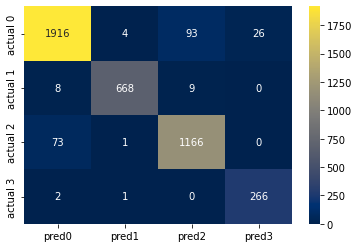

In [9]:
mat = plot(df.level,df.predictions)

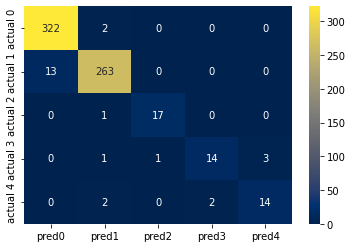

In [30]:
mat = plot(df.ground_truth,df.pred)

## Binary

In [13]:
count0_sush = (df['pred'] == 0).sum()
count1_sush = (df['pred'] == 1).sum()
print('count of zero by sush',count0_sush)
print('count of one by sush', count1_sush)

count of zero by sush 102
count of one by sush 65


In [14]:
count0_sush = (df['ground_truth'] == 0).sum()
count1_sush = (df['ground_truth'] == 1).sum()
print('count of zero by Aalam',count0_sush)
print('count of one by Aalam', count1_sush)

count of zero by Aalam 53
count of one by Aalam 114


### Multi-class by sushruta

In [15]:
count0_sush = (df['pred'] == 0).sum()
count1_sush = (df['pred'] == 1).sum()
count2_sush = (df['pred'] == 2).sum()
count3_sush = (df['pred'] == 3).sum()
count4_sush = (df['pred'] == 4).sum()
print('count of DR0 by sush',count0_sush)
print('count of DR1 by sush', count1_sush)
print('count of DR2 by sush',count2_sush)
print('count of DR3 by sush', count3_sush)
print('count of DR4 by sush', count4_sush)

count of DR0 by sush 102
count of DR1 by sush 65
count of DR2 by sush 0
count of DR3 by sush 0
count of DR4 by sush 0


## Multi-class for Aalam

In [16]:
count0_sush = (df['ground_truth'] == 0).sum()
count1_sush = (df['ground_truth'] == 1).sum()
count2_sush = (df['ground_truth'] == 2).sum()
count3_sush = (df['ground_truth'] == 3).sum()
count4_sush = (df['ground_truth'] == 4).sum()
print('count of DR0 by Aalam',count0_sush)
print('count of DR1 by Aalam', count1_sush)
print('count of DR2 by Aalam',count2_sush)
print('count of DR3 by Aalam', count3_sush)
print('count of DR4 by Aalam', count4_sush)

count of DR0 by Aalam 53
count of DR1 by Aalam 114
count of DR2 by Aalam 0
count of DR3 by Aalam 0
count of DR4 by Aalam 0
